<a href="https://colab.research.google.com/github/Balajinanda/Datascience-Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Define the path to the uploaded zip file and extraction directory
zip_file_path = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset.zip'
extract_dir = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
extracted_files

['subjectInformation.pdf',
 'DataCollectionProtocol.pdf',
 'readme.pdf',
 'PerformedActivitiesSummary.pdf',
 'DescriptionOfActivities.pdf',
 'Protocol',
 'Optional',
 'PAMAP2_Dataset']

In [3]:
# List the contents of the extracted directory to explore its structure
opportunity_dataset_path = os.path.join(extract_dir, 'PAMAP2_Dataset')
dataset_contents = os.listdir(opportunity_dataset_path)
dataset_contents

['Protocol',
 'Optional',
 'PerformedActivitiesSummary.pdf',
 'DescriptionOfActivities.pdf',
 'DataCollectionProtocol.pdf',
 'subjectInformation.pdf',
 'readme.pdf']

In [4]:
# List the contents of the 'dataset' folder
dataset_folder_path = os.path.join(opportunity_dataset_path, 'Protocol')
dataset_files = os.listdir(dataset_folder_path)
dataset_files

['subject101.dat',
 'subject102.dat',
 'subject103.dat',
 'subject104.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

In [5]:
import pandas as pd
import numpy as np

# Define the path to the .dat file (update the file path)
file_path = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset/Protocol/subject101.dat'

# Define column names based on the dataset documentation
columns = [
    "timestamp", "activity_id", "heart_rate",
    # IMU Hand
    "hand_temp", "hand_acc1_x", "hand_acc1_y", "hand_acc1_z",
    "hand_acc2_x", "hand_acc2_y", "hand_acc2_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "hand_orientation_1", "hand_orientation_2", "hand_orientation_3", "hand_orientation_4",
    # IMU Chest
    "chest_temp", "chest_acc1_x", "chest_acc1_y", "chest_acc1_z",
    "chest_acc2_x", "chest_acc2_y", "chest_acc2_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "chest_orientation_1", "chest_orientation_2", "chest_orientation_3", "chest_orientation_4",
    # IMU Ankle
    "ankle_temp", "ankle_acc1_x", "ankle_acc1_y", "ankle_acc1_z",
    "ankle_acc2_x", "ankle_acc2_y", "ankle_acc2_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
    "ankle_orientation_1", "ankle_orientation_2", "ankle_orientation_3", "ankle_orientation_4"
]

# Load the .dat file into a pandas DataFrame
data = pd.read_csv(file_path, sep=' ', header=None, names=columns)

# Display basic information about the data
print("Data loaded successfully!")
print(data.info())
print(data.head())

# Handle missing data (NaNs)
data = data.dropna()  # Option 1: Drop rows with NaN values
# data = data.fillna(method='ffill')  # Option 2: Forward fill (if preferred)

# Exclude rows with Activity ID = 0 (transient activities)
filtered_data = data[data["activity_id"] != 0]

# Display the filtered data
print(f"Filtered data shape: {filtered_data.shape}")
print(filtered_data.head())

Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376417 entries, 0 to 376416
Data columns (total 54 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   timestamp            376417 non-null  float64
 1   activity_id          376417 non-null  int64  
 2   heart_rate           34389 non-null   float64
 3   hand_temp            374963 non-null  float64
 4   hand_acc1_x          374963 non-null  float64
 5   hand_acc1_y          374963 non-null  float64
 6   hand_acc1_z          374963 non-null  float64
 7   hand_acc2_x          374963 non-null  float64
 8   hand_acc2_y          374963 non-null  float64
 9   hand_acc2_z          374963 non-null  float64
 10  hand_gyro_x          374963 non-null  float64
 11  hand_gyro_y          374963 non-null  float64
 12  hand_gyro_z          374963 non-null  float64
 13  hand_mag_x           374963 non-null  float64
 14  hand_mag_y           374963 non-null  floa

In [6]:
# Summary statistics
print(filtered_data.describe())

          timestamp   activity_id    heart_rate     hand_temp   hand_acc1_x  \
count  22590.000000  22590.000000  22590.000000  22590.000000  22590.000000   
mean    1701.668593      8.295396    121.964542     32.429537     -4.121835   
std     1098.657685      6.500983     26.524246      1.119505      6.726207   
min       37.700000      1.000000     78.000000     30.187500    -42.770700   
25%      656.417500      3.000000    100.000000     31.562500     -8.238433   
50%     1601.275000      6.000000    123.000000     32.625000     -3.877355   
75%     2687.735000     13.000000    137.000000     33.375000      0.751062   
max     3626.300000     24.000000    183.000000     33.875000     11.807300   

        hand_acc1_y   hand_acc1_z   hand_acc2_x   hand_acc2_y   hand_acc2_z  \
count  22590.000000  22590.000000  22590.000000  22590.000000  22590.000000   
mean       5.820877      3.758208     -4.080199      5.852148      3.918839   
std        5.898736      3.727674      6.768574    

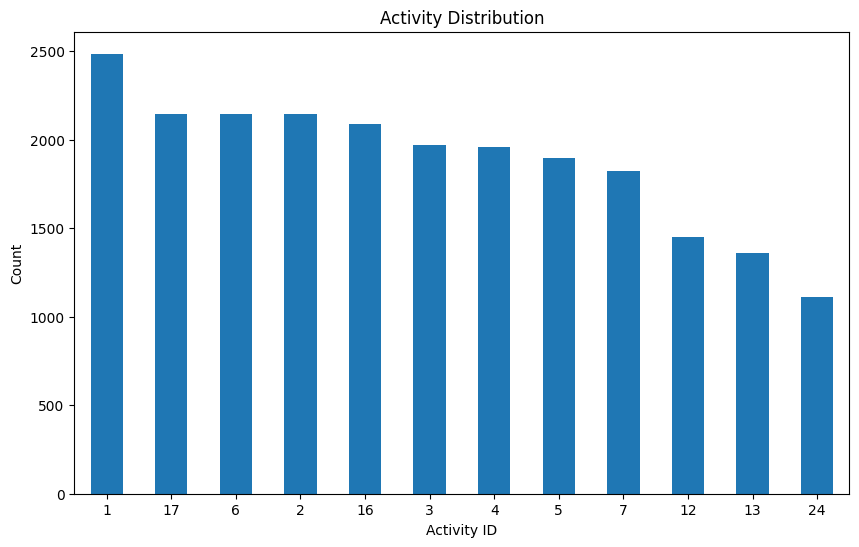

In [7]:
import matplotlib.pyplot as plt

# Distribution of activity IDs
activity_counts = filtered_data["activity_id"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title("Activity Distribution")
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


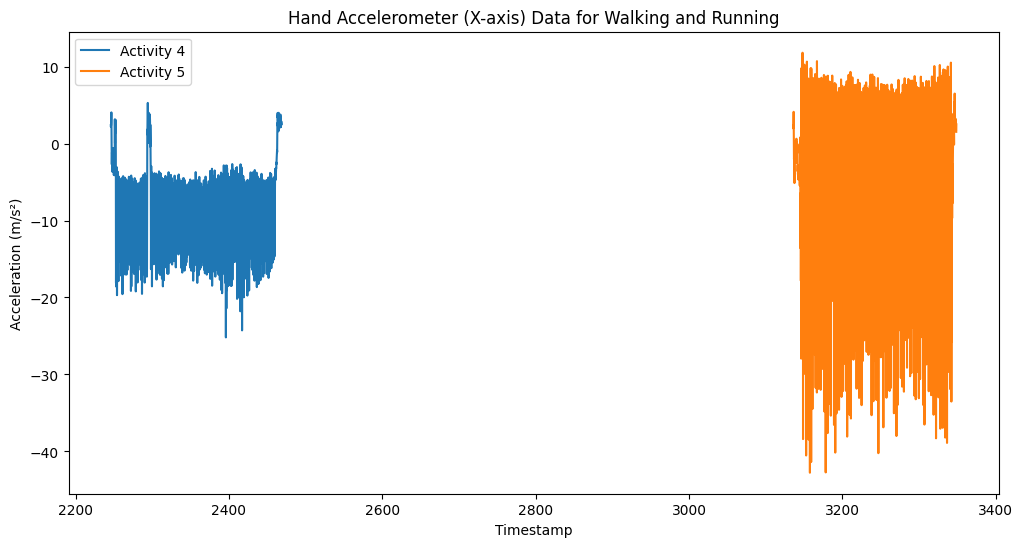

In [8]:
# Filter data for specific activities (e.g., walking and running)
activity_subset = filtered_data[filtered_data["activity_id"].isin([4, 5])]

# Plot accelerometer data for the hand
plt.figure(figsize=(12, 6))
for activity_id in [4, 5]:
    subset = activity_subset[activity_subset["activity_id"] == activity_id]
    plt.plot(subset["timestamp"], subset["hand_acc1_x"], label=f"Activity {activity_id}")

plt.title("Hand Accelerometer (X-axis) Data for Walking and Running")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()


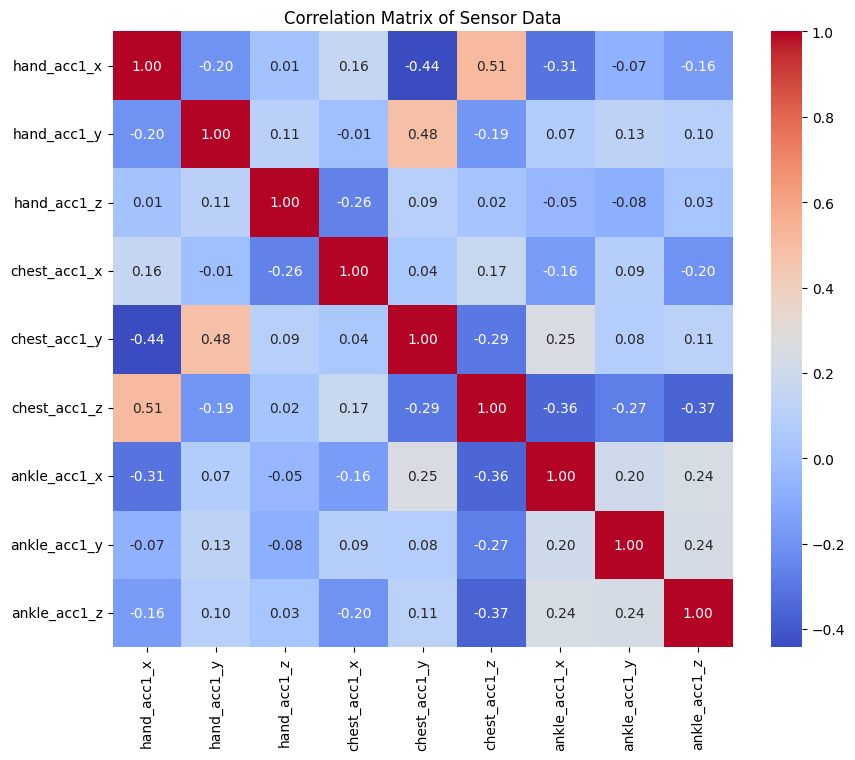

In [9]:
# Select relevant columns for correlation
sensor_data = filtered_data[[
    "hand_acc1_x", "hand_acc1_y", "hand_acc1_z",
    "chest_acc1_x", "chest_acc1_y", "chest_acc1_z",
    "ankle_acc1_x", "ankle_acc1_y", "ankle_acc1_z"
]]

# Correlation matrix
correlation_matrix = sensor_data.corr()

# Heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Sensor Data")
plt.show()

In [14]:
import os
import pandas as pd

# Directory containing all .dat files
data_dir = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset/Protocol'

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Loop through each file in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.dat'):  # Process only .dat files
        file_path = os.path.join(data_dir, file_name)

        # Load the .dat file
        temp_data = pd.read_csv(file_path, sep=' ', header=None, names=columns)

        # Append to the combined DataFrame
        combined_data = pd.concat([combined_data, temp_data], ignore_index=True)

# Display combined dataset information
print("Total Combined Data Shape:", combined_data.shape)
print(combined_data.info())

Total Combined Data Shape: (2872533, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 54 columns):
 #   Column               Dtype  
---  ------               -----  
 0   timestamp            float64
 1   activity_id          int64  
 2   heart_rate           float64
 3   hand_temp            float64
 4   hand_acc1_x          float64
 5   hand_acc1_y          float64
 6   hand_acc1_z          float64
 7   hand_acc2_x          float64
 8   hand_acc2_y          float64
 9   hand_acc2_z          float64
 10  hand_gyro_x          float64
 11  hand_gyro_y          float64
 12  hand_gyro_z          float64
 13  hand_mag_x           float64
 14  hand_mag_y           float64
 15  hand_mag_z           float64
 16  hand_orientation_1   float64
 17  hand_orientation_2   float64
 18  hand_orientation_3   float64
 19  hand_orientation_4   float64
 20  chest_temp           float64
 21  chest_acc1_x         float64
 22  chest_acc1_y         floa

In [15]:
# Check for missing data
print("Missing values per column:")
print(combined_data.isnull().sum())

# Drop rows with NaN values
cleaned_data = combined_data.dropna()

# Verify the cleaned data
print(f"Shape after dropping missing values: {cleaned_data.shape}")


Missing values per column:
timestamp                    0
activity_id                  0
heart_rate             2610265
hand_temp                13141
hand_acc1_x              13141
hand_acc1_y              13141
hand_acc1_z              13141
hand_acc2_x              13141
hand_acc2_y              13141
hand_acc2_z              13141
hand_gyro_x              13141
hand_gyro_y              13141
hand_gyro_z              13141
hand_mag_x               13141
hand_mag_y               13141
hand_mag_z               13141
hand_orientation_1       13141
hand_orientation_2       13141
hand_orientation_3       13141
hand_orientation_4       13141
chest_temp                3563
chest_acc1_x              3563
chest_acc1_y              3563
chest_acc1_z              3563
chest_acc2_x              3563
chest_acc2_y              3563
chest_acc2_z              3563
chest_gyro_x              3563
chest_gyro_y              3563
chest_gyro_z              3563
chest_mag_x               3563
chest_mag_y 

In [16]:
# Exclude transient activities
cleaned_data = cleaned_data[cleaned_data["activity_id"] != 0]

# Verify the filtered data
print(f"Shape after removing transient activities: {cleaned_data.shape}")


Shape after removing transient activities: (175498, 54)


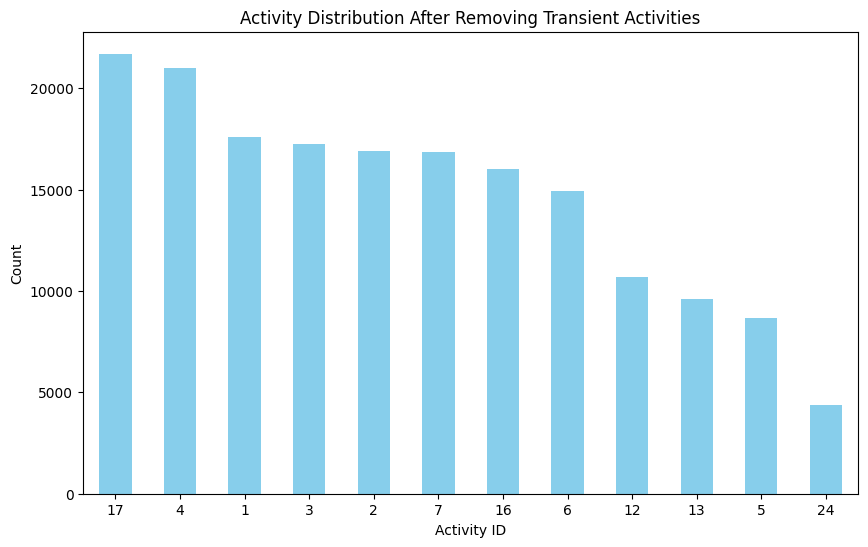

In [17]:
# Activity distribution after filtering
activity_counts = cleaned_data["activity_id"].value_counts()

# Plot activity distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title("Activity Distribution After Removing Transient Activities")
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

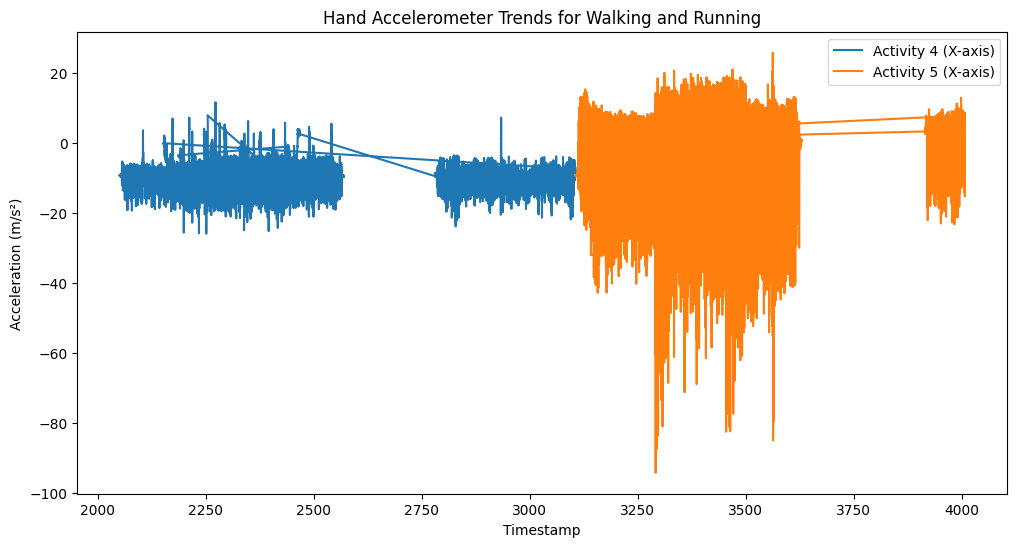

In [18]:
# Filter for specific activities (e.g., walking and running)
key_activities = cleaned_data[cleaned_data["activity_id"].isin([4, 5])]

# Plot accelerometer data trends
plt.figure(figsize=(12, 6))
for activity_id in [4, 5]:
    subset = key_activities[key_activities["activity_id"] == activity_id]
    plt.plot(subset["timestamp"], subset["hand_acc1_x"], label=f"Activity {activity_id} (X-axis)")

plt.title("Hand Accelerometer Trends for Walking and Running")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()

In [19]:
# Summary statistics by activity
sensor_summary = cleaned_data.groupby("activity_id")[[
    "hand_acc1_x", "hand_acc1_y", "hand_acc1_z"
]].agg(['mean', 'std', 'min', 'max'])

# Flatten multi-index columns for readability
sensor_summary.columns = ['_'.join(col) for col in sensor_summary.columns]
print(sensor_summary)


             hand_acc1_x_mean  hand_acc1_x_std  hand_acc1_x_min  \
activity_id                                                       
1                    3.670616         4.063472         -19.9797   
2                   -1.379753         2.884227         -18.7583   
3                   -7.082347         3.873104         -18.8911   
4                  -10.085077         3.376594         -25.8954   
5                   -6.881030        13.077820         -94.1359   
6                   -5.160804         4.307872         -75.8781   
7                   -4.681095         4.887586         -43.9102   
12                  -8.731194         4.453900         -41.8381   
13                  -6.275302         5.562820         -36.1380   
16                  -7.169658         4.199008         -36.7324   
17                  -3.380207         3.259784         -26.2966   
24                  -4.101331         7.701460         -56.2879   

             hand_acc1_x_max  hand_acc1_y_mean  hand_acc1_y_s

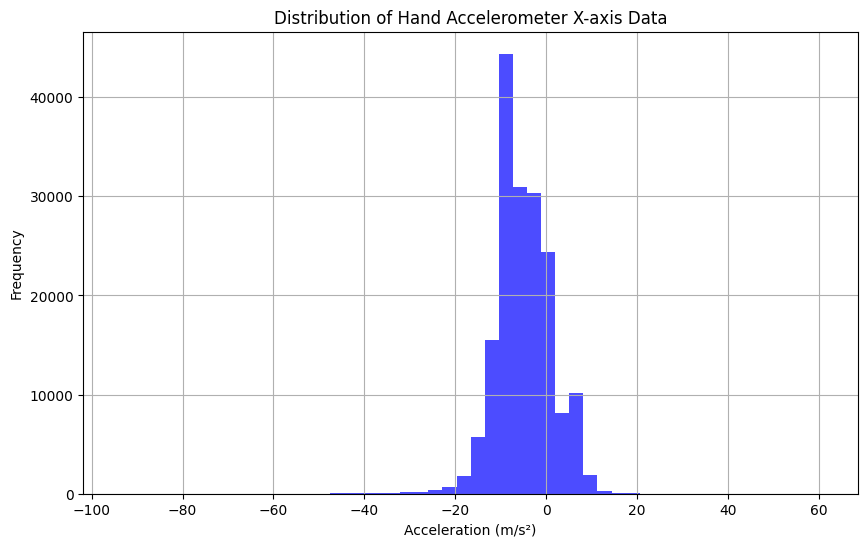

In [23]:
import matplotlib.pyplot as plt

# Plot histogram for hand accelerometer X-axis
plt.figure(figsize=(10, 6))
cleaned_data["hand_acc1_x"].hist(bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Hand Accelerometer X-axis Data")
plt.xlabel("Acceleration (m/s²)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-24-1906d9b88031>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity_id", y="hand_acc1_x", data=cleaned_data, palette="Set3")


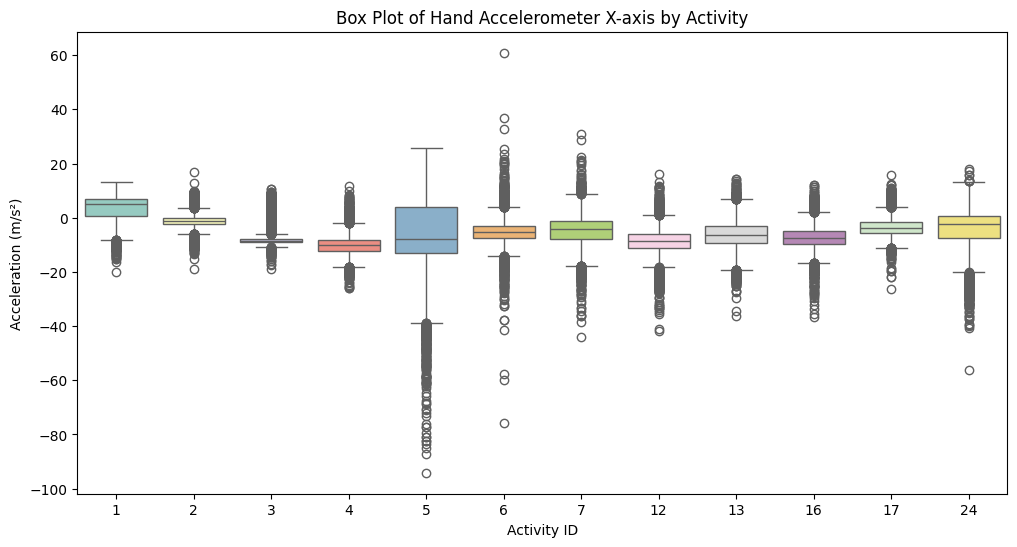

In [24]:
import seaborn as sns

# Box plot for hand accelerometer X-axis by activity
plt.figure(figsize=(12, 6))
sns.boxplot(x="activity_id", y="hand_acc1_x", data=cleaned_data, palette="Set3")
plt.title("Box Plot of Hand Accelerometer X-axis by Activity")
plt.xlabel("Activity ID")
plt.ylabel("Acceleration (m/s²)")
plt.show()


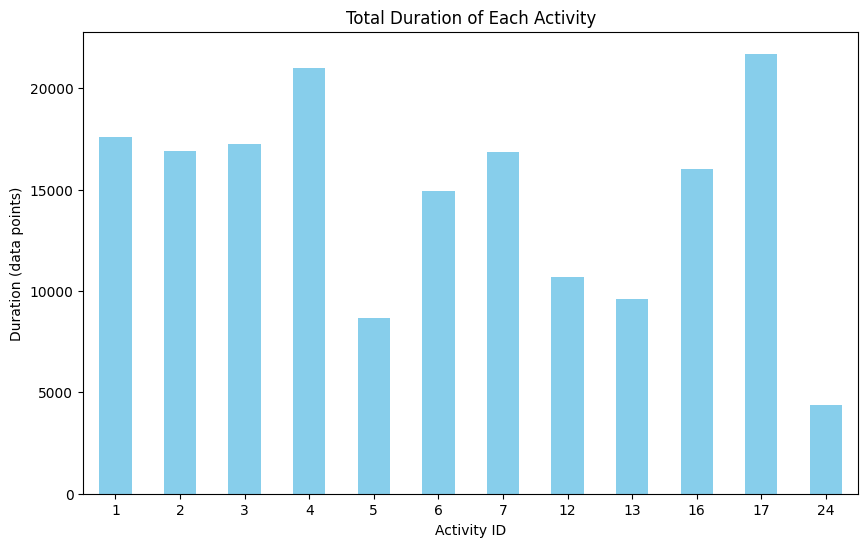

In [25]:
# Calculate total duration per activity
activity_duration = cleaned_data.groupby("activity_id")["timestamp"].count()

# Plot activity duration
plt.figure(figsize=(10, 6))
activity_duration.plot(kind='bar', color='skyblue')
plt.title("Total Duration of Each Activity")
plt.xlabel("Activity ID")
plt.ylabel("Duration (data points)")
plt.xticks(rotation=0)
plt.show()


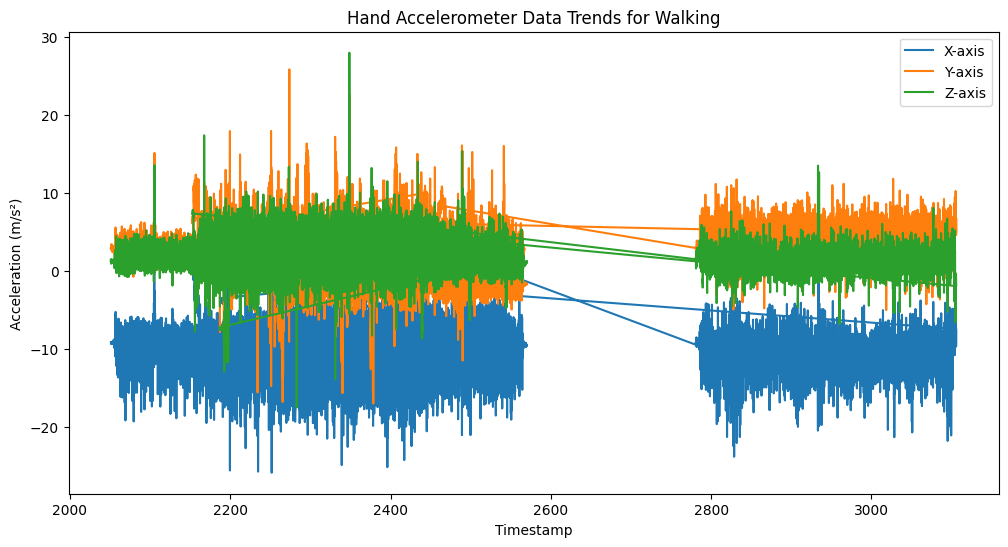

In [26]:
# Filter data for walking (activity_id = 4)
walking_data = cleaned_data[cleaned_data["activity_id"] == 4]

# Plot hand accelerometer data over time
plt.figure(figsize=(12, 6))
plt.plot(walking_data["timestamp"], walking_data["hand_acc1_x"], label="X-axis")
plt.plot(walking_data["timestamp"], walking_data["hand_acc1_y"], label="Y-axis")
plt.plot(walking_data["timestamp"], walking_data["hand_acc1_z"], label="Z-axis")
plt.title("Hand Accelerometer Data Trends for Walking")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()


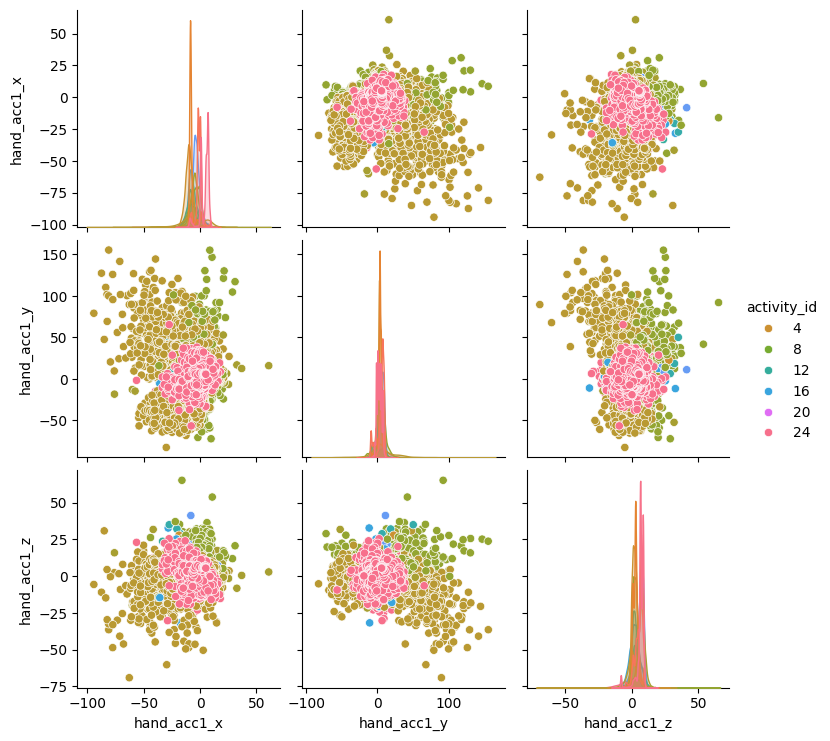

In [27]:
# Subset for pair plotting
subset_data = cleaned_data[["hand_acc1_x", "hand_acc1_y", "hand_acc1_z", "activity_id"]]

# Pair plot
sns.pairplot(subset_data, hue="activity_id", palette="husl", diag_kind="kde")
plt.show()

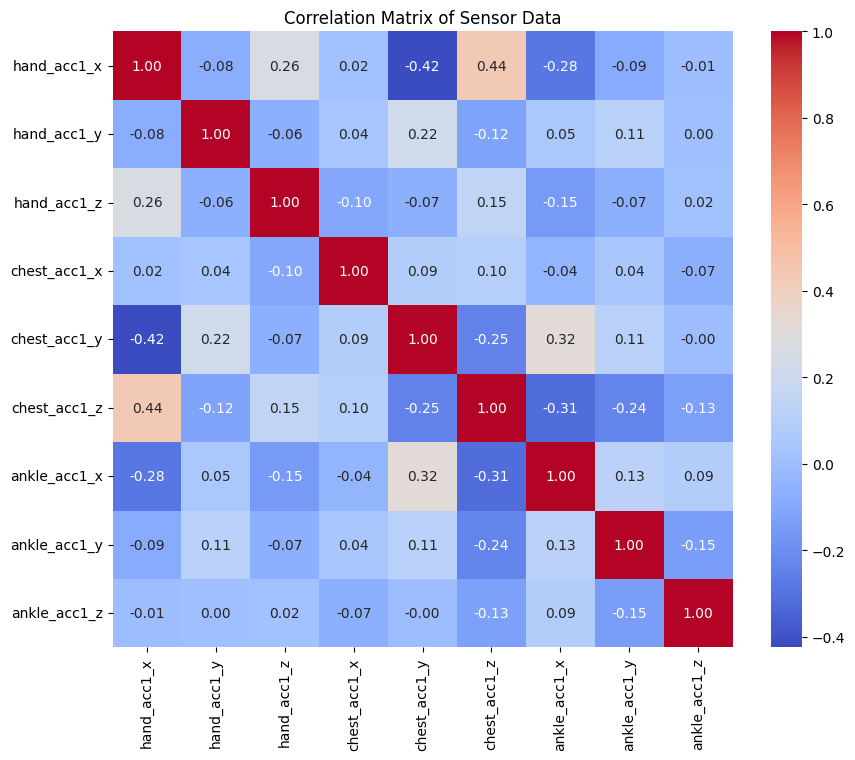

In [30]:
# Select relevant columns for correlation
sensor_data = cleaned_data[[
    "hand_acc1_x", "hand_acc1_y", "hand_acc1_z",
    "chest_acc1_x", "chest_acc1_y", "chest_acc1_z",
    "ankle_acc1_x", "ankle_acc1_y", "ankle_acc1_z"
]]

# Correlation matrix
correlation_matrix = sensor_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Sensor Data")
plt.show()


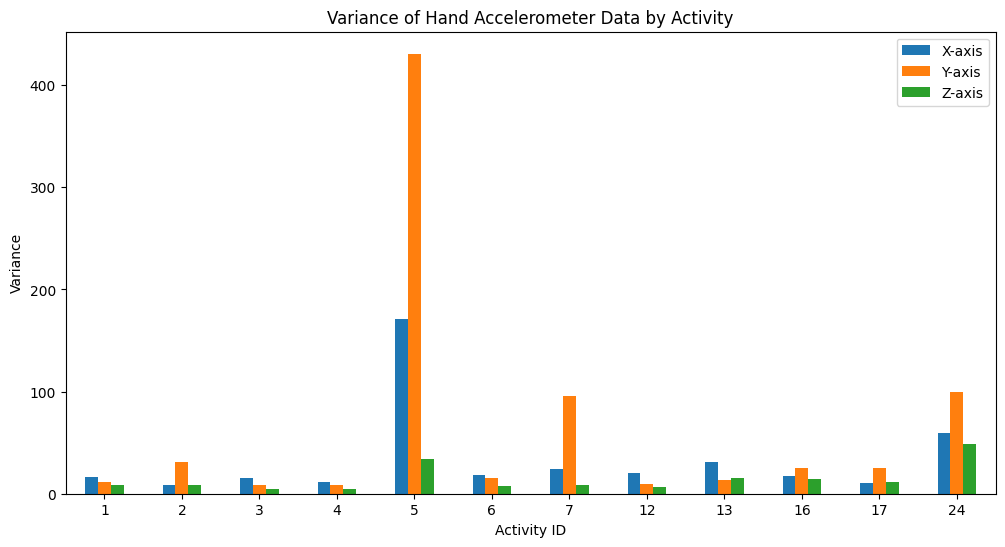

In [32]:
# Calculate variance for each activity and sensor
sensor_variance = cleaned_data.groupby("activity_id")[[
    "hand_acc1_x", "hand_acc1_y", "hand_acc1_z"
]].var()

# Plot variance
sensor_variance.plot(kind='bar', figsize=(12, 6))
plt.title("Variance of Hand Accelerometer Data by Activity")
plt.xlabel("Activity ID")
plt.ylabel("Variance")
plt.legend(["X-axis", "Y-axis", "Z-axis"])
plt.xticks(rotation=0)
plt.show()


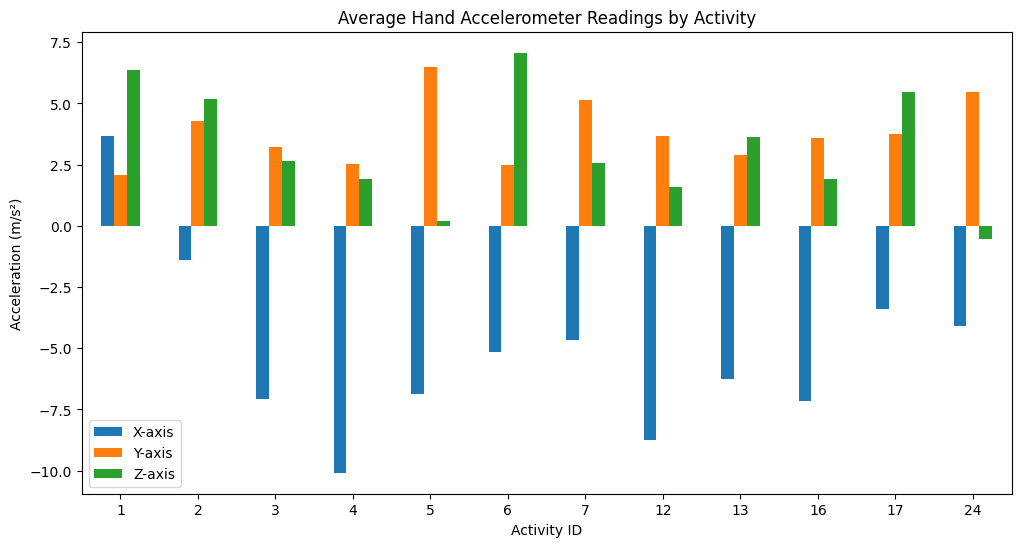

In [31]:
# Group by activity and calculate mean for each sensor
avg_sensor_readings = cleaned_data.groupby("activity_id")[[
    "hand_acc1_x", "hand_acc1_y", "hand_acc1_z"
]].mean()

# Plot average readings
avg_sensor_readings.plot(kind='bar', figsize=(12, 6))
plt.title("Average Hand Accelerometer Readings by Activity")
plt.xlabel("Activity ID")
plt.ylabel("Acceleration (m/s²)")
plt.legend(["X-axis", "Y-axis", "Z-axis"])
plt.xticks(rotation=0)
plt.show()


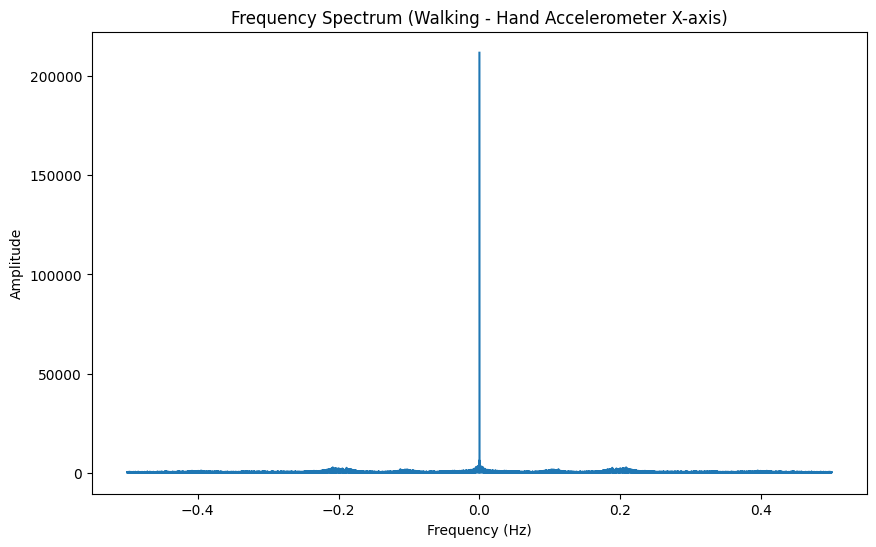

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for a specific activity (e.g., walking)
walking_data = cleaned_data[cleaned_data["activity_id"] == 4]

# Perform FFT on hand accelerometer X-axis
fft_vals = np.fft.fft(walking_data["hand_acc1_x"])
fft_freqs = np.fft.fftfreq(len(fft_vals))

# Plot FFT results
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_vals))
plt.title("Frequency Spectrum (Walking - Hand Accelerometer X-axis)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()


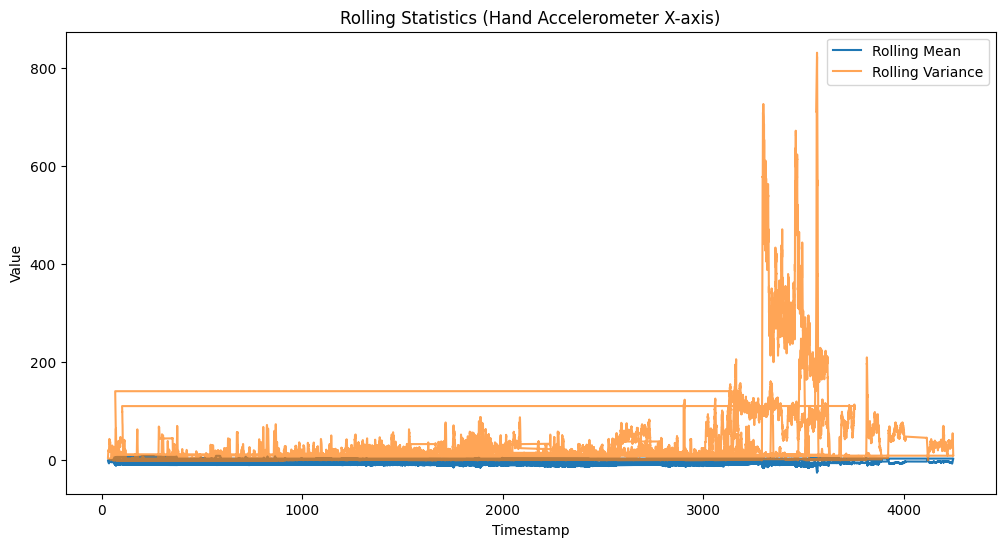

In [37]:
# Calculate rolling mean and variance for hand accelerometer X-axis
rolling_mean = cleaned_data["hand_acc1_x"].rolling(window=50).mean()
rolling_var = cleaned_data["hand_acc1_x"].rolling(window=50).var()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data["timestamp"], rolling_mean, label="Rolling Mean")
plt.plot(cleaned_data["timestamp"], rolling_var, label="Rolling Variance", alpha=0.7)
plt.title("Rolling Statistics (Hand Accelerometer X-axis)")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.show()


In [21]:
# Drop non-feature columns
X = cleaned_data.drop(columns=["activity_id", "timestamp"])
y = cleaned_data["activity_id"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (140398, 52)
Test shape: (35100, 52)


Accuracy: 0.9966096866096866

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3499
           2       1.00      1.00      1.00      3354
           3       1.00      1.00      1.00      3523
           4       1.00      1.00      1.00      4227
           5       1.00      1.00      1.00      1647
           6       1.00      1.00      1.00      3022
           7       1.00      1.00      1.00      3423
          12       0.99      0.99      0.99      2164
          13       0.99      0.99      0.99      1920
          16       0.99      1.00      0.99      3190
          17       1.00      1.00      1.00      4289
          24       1.00      1.00      1.00       842

    accuracy                           1.00     35100
   macro avg       1.00      1.00      1.00     35100
weighted avg       1.00      1.00      1.00     35100



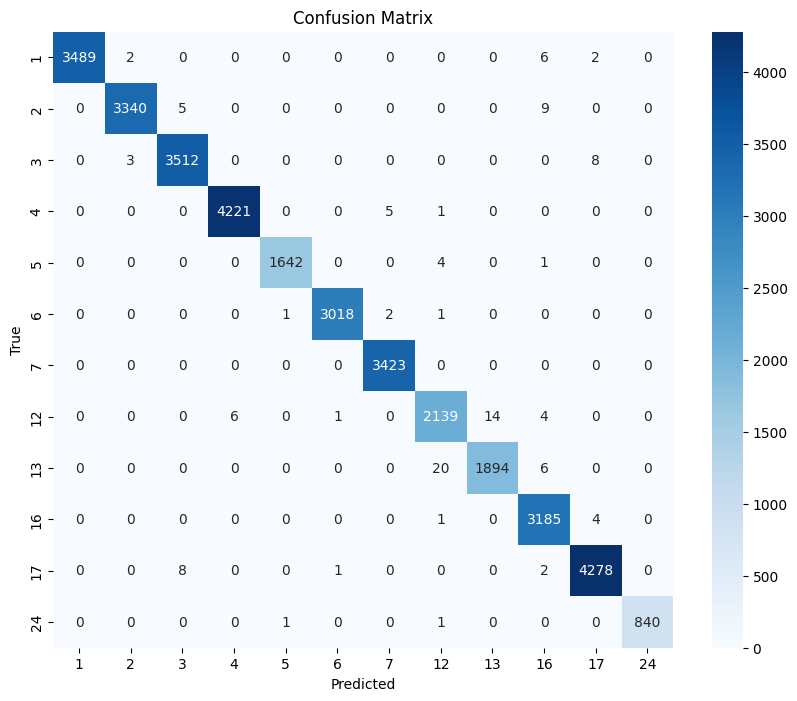

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

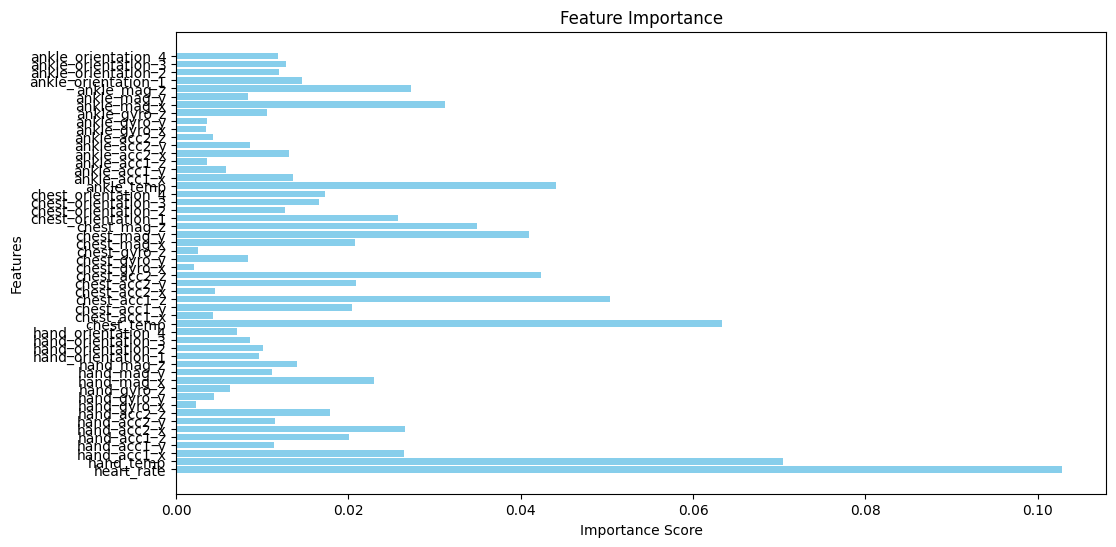

In [34]:
# Get feature importance
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [40]:
import numpy as np

# Get unique class labels
unique_labels = np.unique(y)

# Create a mapping from original to sequential labels
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
print("Label Mapping:", label_mapping)

# Apply the mapping to the labels
y_mapped = y.map(label_mapping)
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)


Label Mapping: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 12: 7, 13: 8, 16: 9, 17: 10, 24: 11}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:16:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9996581196581197

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3499
           2       1.00      1.00      1.00      3354
           3       1.00      1.00      1.00      3523
           4       1.00      1.00      1.00      4227
           5       1.00      1.00      1.00      1647
           6       1.00      1.00      1.00      3022
           7       1.00      1.00      1.00      3423
          12       1.00      1.00      1.00      2164
          13       1.00      1.00      1.00      1920
          16       1.00      1.00      1.00      3190
          17       1.00      1.00      1.00      4289
          24       1.00      1.00      1.00       842

    accuracy                           1.00     35100
   macro avg       1.00      1.00      1.00     35100
weighted avg       1.00      1.00      1.00     35100



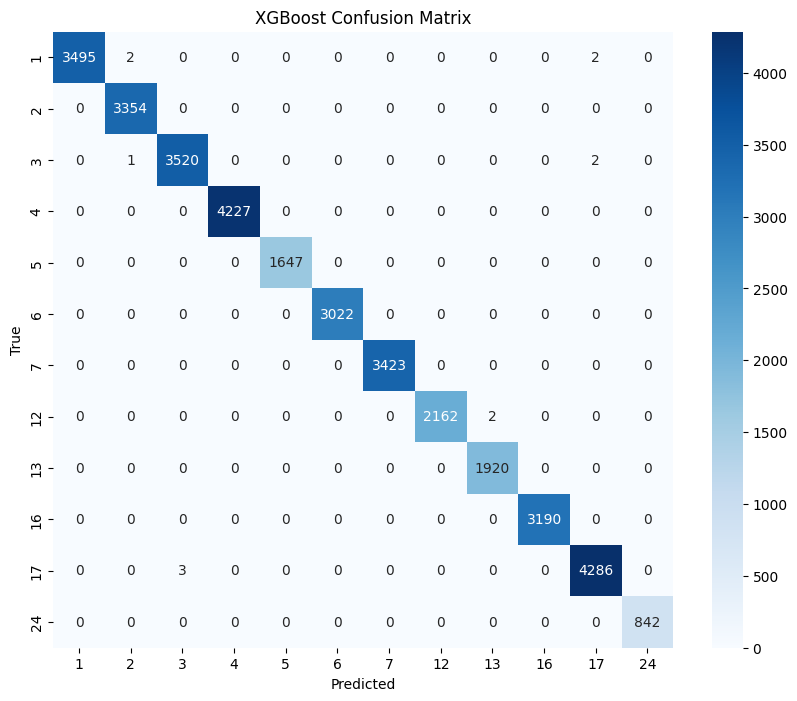

In [42]:
from xgboost import XGBClassifier

# Train XGBoost with remapped labels
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_mapped)

# Predictions (mapped labels)
y_pred_mapped = xgb_model.predict(X_test)

# Reverse mapping to original labels (optional)
reverse_mapping = {v: k for k, v in label_mapping.items()}
y_pred_original = np.vectorize(reverse_mapping.get)(y_pred_mapped)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_original))
print("\nClassification Report:\n", classification_report(y_test, y_pred_original))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred_original)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=reverse_mapping.values(), yticklabels=reverse_mapping.values())
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

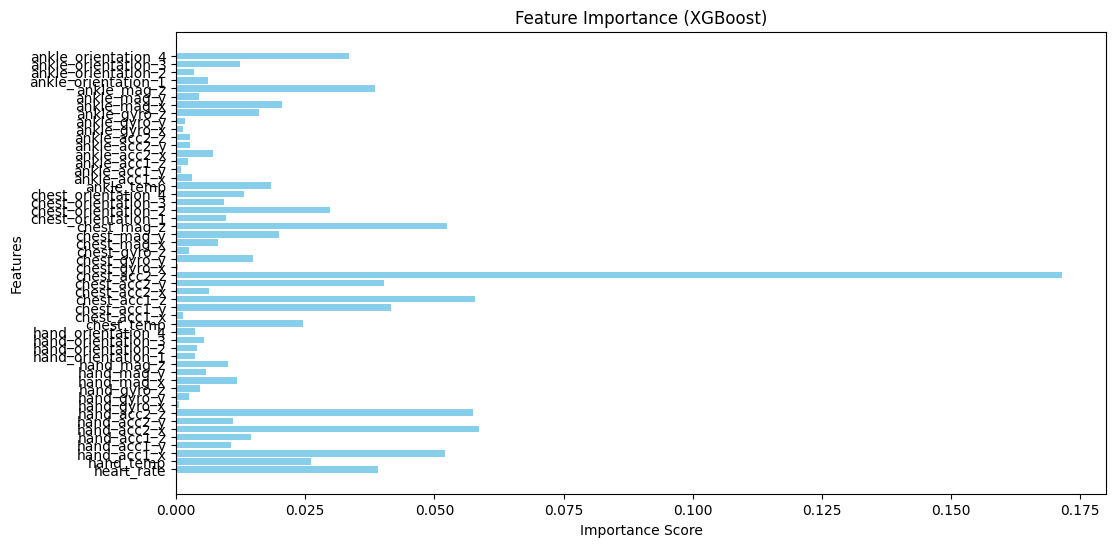

In [43]:
# Feature importance for XGBoost
feature_importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(X_train.columns, feature_importances_xgb, color='skyblue')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [46]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_train_mapped:", np.unique(y_train_mapped))

# Replace y_train and y_test with their mapped counterparts
y_train = y_train_mapped
y_test = y_test_mapped


Unique values in y_train: [ 1  2  3  4  5  6  7 12 13 16 17 24]
Unique values in y_train_mapped: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(12, activation='softmax')  # Ensure output matches the number of mapped labels
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [48]:
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])


Epoch 1/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8794 - loss: 0.3736 - val_accuracy: 0.9196 - val_loss: 0.2481
Epoch 2/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8831 - loss: 0.3658 - val_accuracy: 0.9252 - val_loss: 0.2368
Epoch 3/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8846 - loss: 0.3606 - val_accuracy: 0.9259 - val_loss: 0.2289
Epoch 4/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8845 - loss: 0.3570 - val_accuracy: 0.9255 - val_loss: 0.2283
Epoch 5/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8884 - loss: 0.3454 - val_accuracy: 0.9268 - val_loss: 0.2258
Epoch 6/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8919 - loss: 0.3384 - val_accuracy: 0.9314 - val_loss: 0.2191
Epoch 7/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8935 - loss: 0.3347 - val_accuracy: 0.9297 - val_loss: 0.2197
Epoch 8/50
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8933 - loss: 0

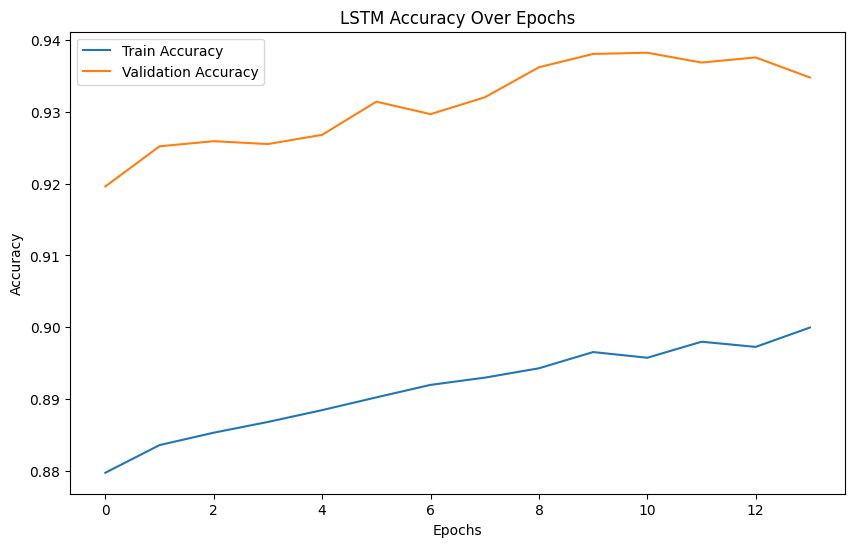

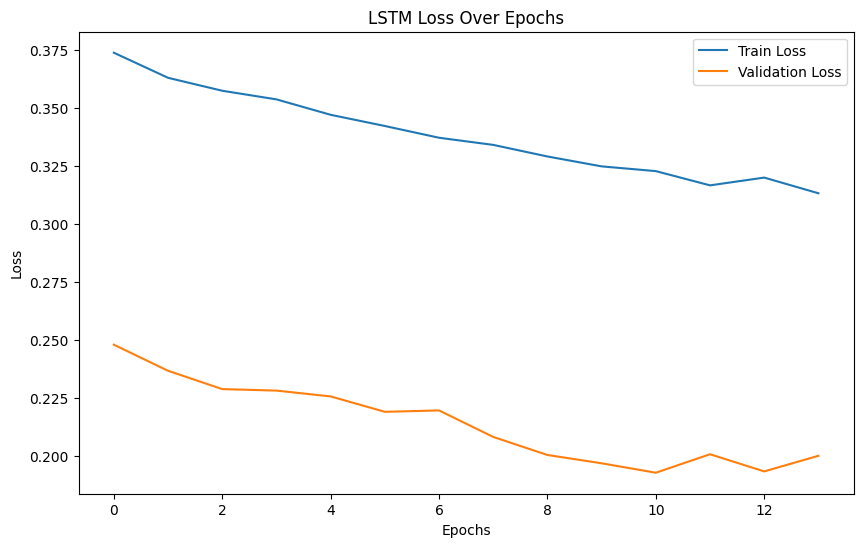

In [51]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [52]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_lstm, y_test)
print("LSTM Test Accuracy:", test_acc)

1097/1097 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9358 - loss: 0.2009
LSTM Test Accuracy: 0.9382051229476929
